In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Initial Data Inspection

In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data Exploration

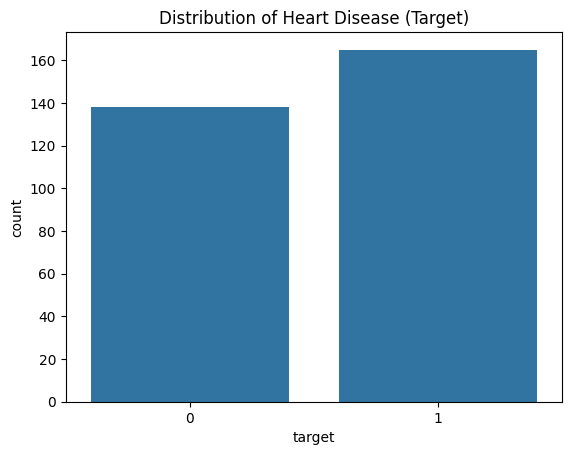

target
1    165
0    138
Name: count, dtype: int64




In [12]:
# The 'target' column indicates the presence (1) or absence (0) of heart disease
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease (Target)')
plt.show()
print(df['target'].value_counts())
print("\n")

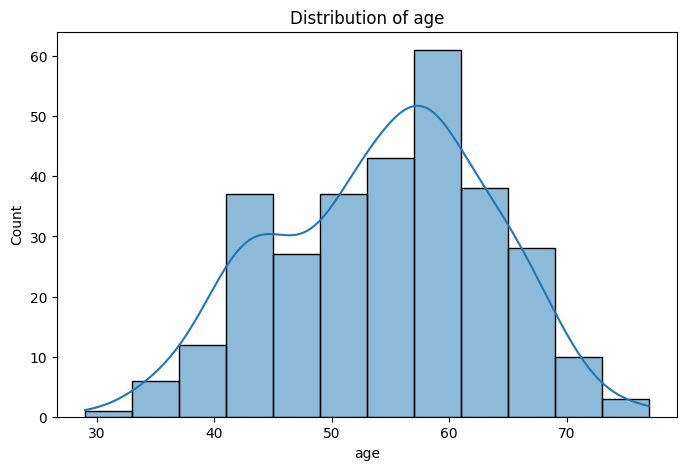

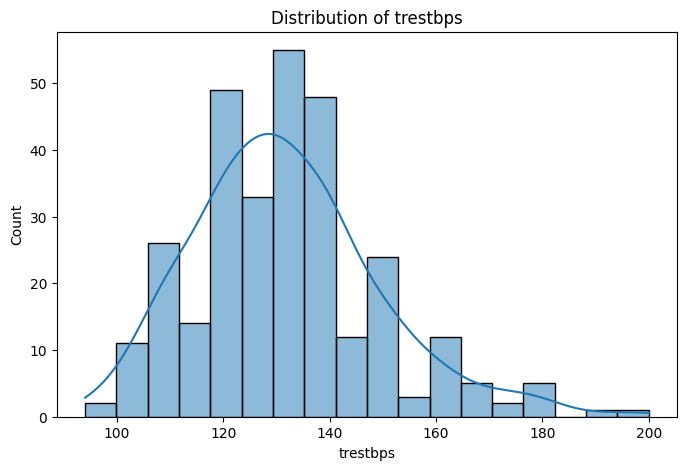

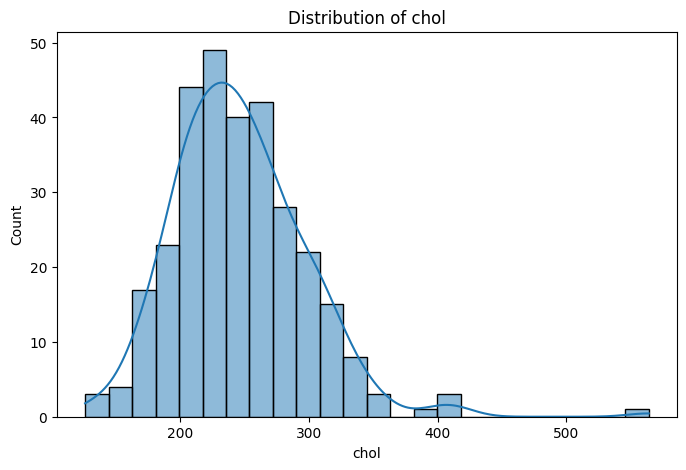

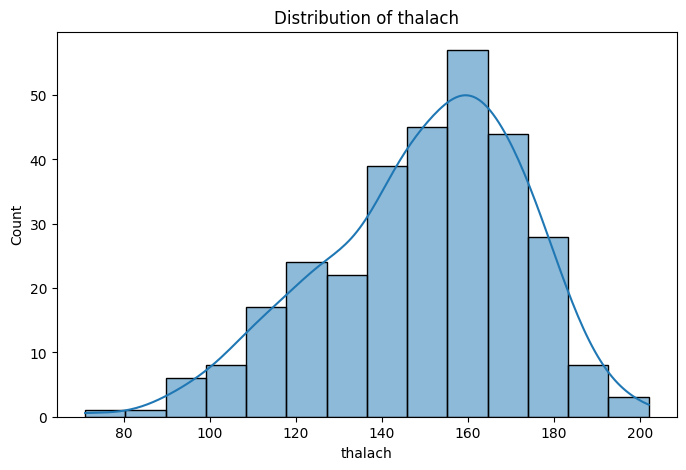

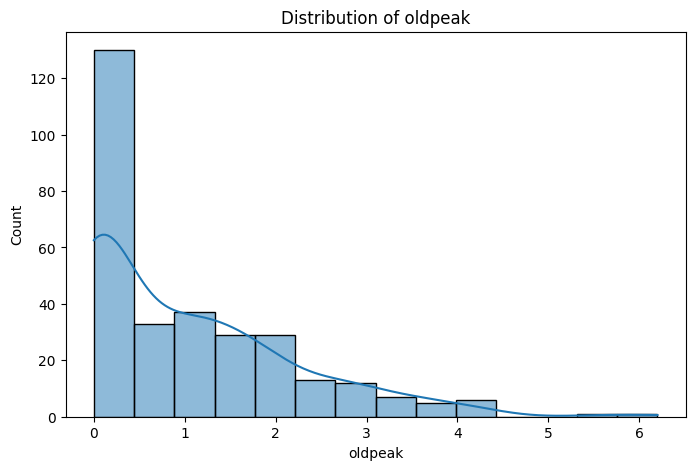

In [ ]:
print("--- Feature Distribution (Numerical Features) ---")
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

--- Feature Distribution (Categorical Features) ---


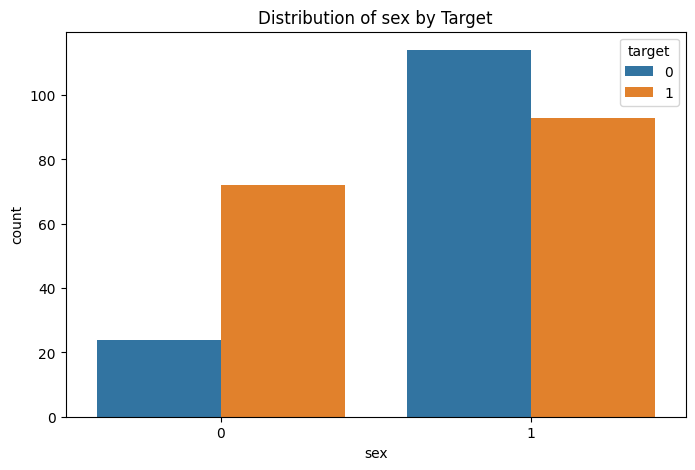

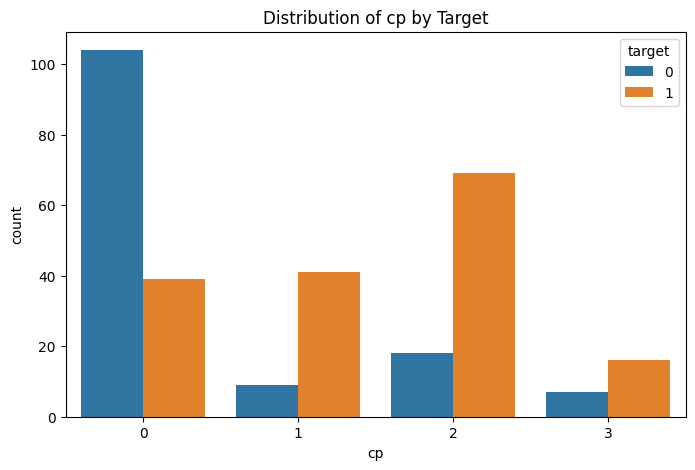

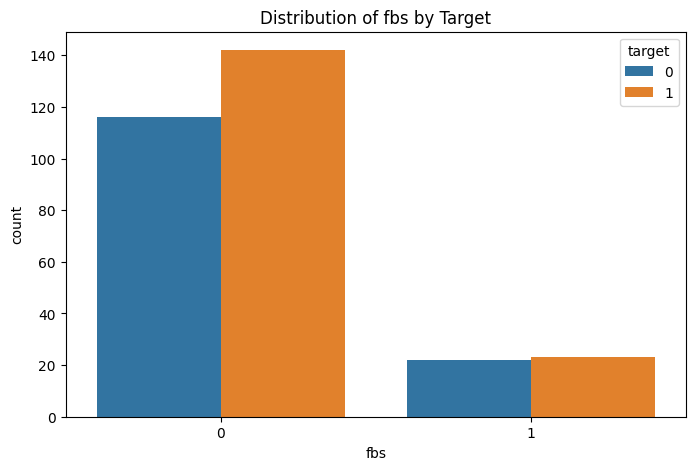

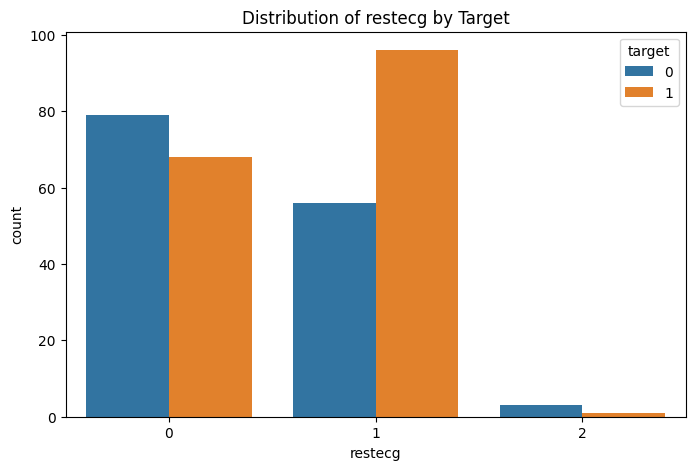

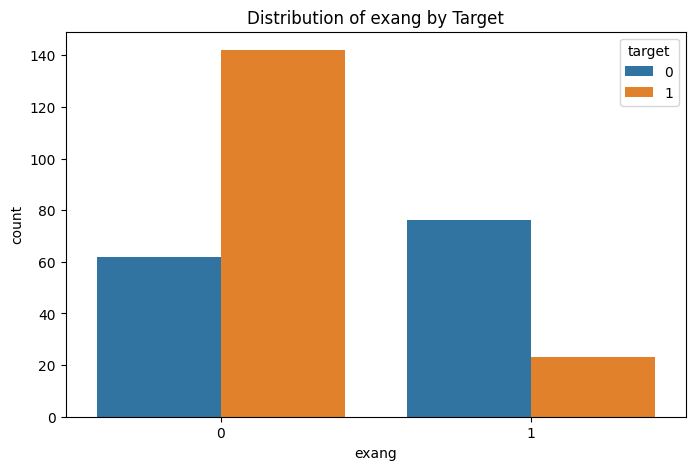

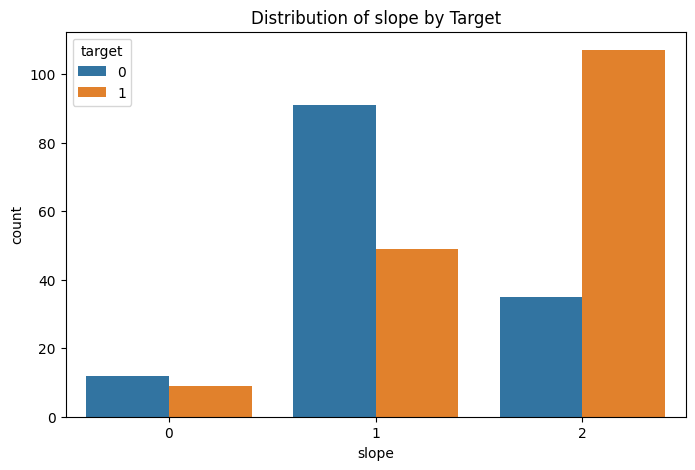

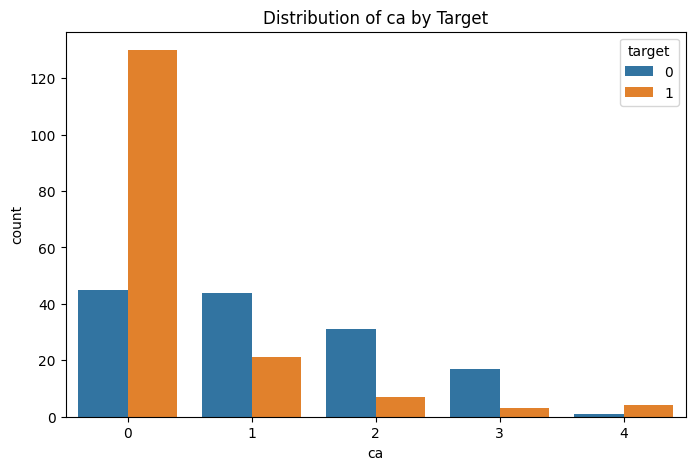

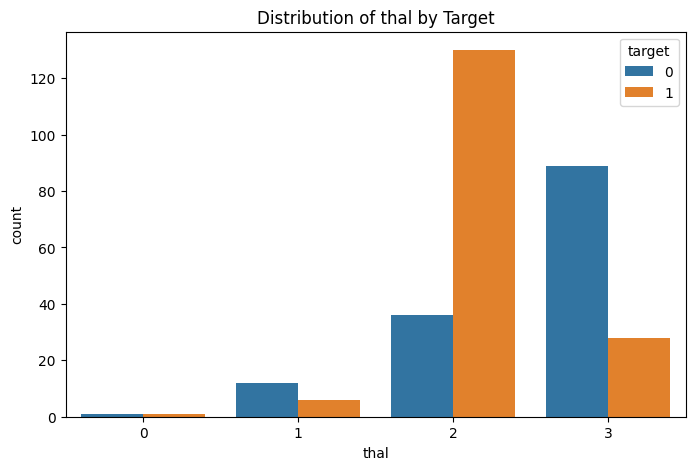

In [14]:
print("--- Feature Distribution (Categorical Features) ---")
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, data=df, hue='target')
    plt.title(f'Distribution of {feature} by Target')
    plt.show()

--- Correlation Matrix ---


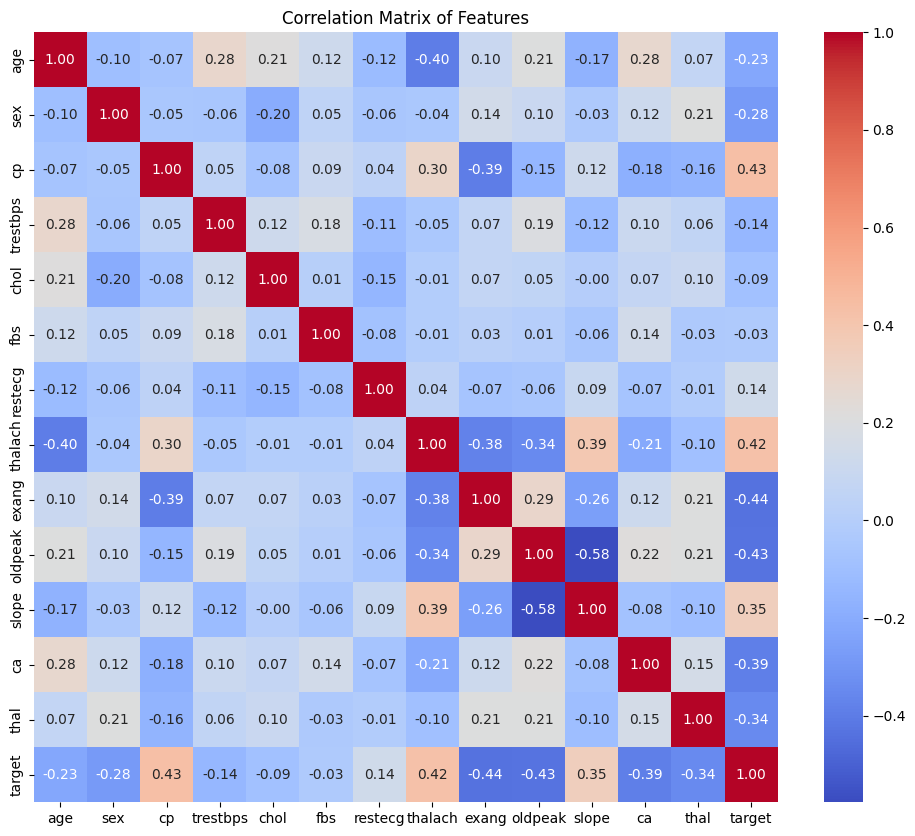

In [15]:
print("--- Correlation Matrix ---")
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [16]:
# Observe correlations with 'target' to get insights into important features.
print(df.corr()['target'].sort_values(ascending=False))

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


### Data pre-processing

In [17]:
# Handle Categorical Variables (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [18]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

In [19]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [20]:
# Feature Scaling (Standardization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
print("\n--- Data Preprocessing Complete ---")
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


--- Data Preprocessing Complete ---
Shape of X_train_scaled: (242, 22)
Shape of X_test_scaled: (61, 22)
Shape of y_train: (242,)
Shape of y_test: (61,)


### Model Training

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("\n--- Model Training Complete ---")
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


--- Model Training Complete ---
Model coefficients: [[ 0.23682878 -0.28893024 -0.53482496  0.31876617 -0.35698785 -0.69310285
   0.35073633  0.90332707  0.54390521  0.03821545  0.20676409 -0.11778489
  -0.41142245 -0.24843532  0.35509902 -0.74893302 -0.78149261 -0.31482
   0.19225151  0.08775211  0.38401713 -0.46835144]]
Model intercept: [0.22324184]


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
y_pred = model.predict(X_test_scaled)

In [24]:
#Classification Report (combines precision, recall, f1-score)
from sklearn.metrics import classification_report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [25]:
#Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8525



Confusion Matrix:
 [[23  5]
 [ 4 29]]


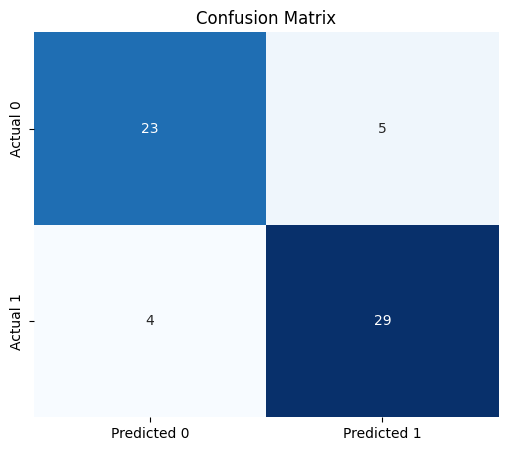

In [26]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

In [27]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8529
Recall: 0.8788
F1-Score: 0.8657


In [28]:
# Map coefficients to feature names
feature_names = X.columns
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_[0]})
coefficients['Absolute_Coefficient'] = np.abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)
print("\n--- Feature Importance (based on absolute coefficients) ---")
print(coefficients)

# Note: Interpretation of coefficients in Logistic Regression can be tricky
# due to the log-odds scale. Exponentiating them (np.exp(coeff)) gives
# the odds ratio, which can be easier to interpret: For a one-unit increase
# in the feature, the odds of the positive class are multiplied by exp(coeff).


--- Feature Importance (based on absolute coefficients) ---
      Feature  Coefficient  Absolute_Coefficient
7        cp_2     0.903327              0.903327
16       ca_2    -0.781493              0.781493
15       ca_1    -0.748933              0.748933
5       sex_1    -0.693103              0.693103
8        cp_3     0.543905              0.543905
2        chol    -0.534825              0.534825
21     thal_3    -0.468351              0.468351
12    exang_1    -0.411422              0.411422
20     thal_2     0.384017              0.384017
4     oldpeak    -0.356988              0.356988
14    slope_2     0.355099              0.355099
6        cp_1     0.350736              0.350736
3     thalach     0.318766              0.318766
17       ca_3    -0.314820              0.314820
1    trestbps    -0.288930              0.288930
13    slope_1    -0.248435              0.248435
0         age     0.236829              0.236829
10  restecg_1     0.206764              0.206764
18      